In [1]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as lt

In [2]:
Taxis = pd.read_csv("Taxis_NYML.csv")
Taxis

,ID_taxis,Taxis,payment_type,total_amount,PU_ID_borough,DO_ID_borough,pickup_hour,date
0,0,Green,1.0,9.30,5,5,15,4/3/2019
1,1,Green,2.0,33.80,1,1,15,4/3/2019
2,2,Green,1.0,57.30,5,5,16,4/3/2019
3,3,Green,1.0,38.65,5,1,16,4/3/2019
4,4,Green,2.0,16.80,1,1,17,4/3/2019
...,...,...,...,...,...,...,...,...
2437,2437,Yellow,1.0,18.00,3,3,19,26/12/2022
2438,2438,Yellow,1.0,28.55,3,3,19,26/12/2022
2439,2439,Yellow,0.0,28.21,3,3,13,20/12/2022
2440,2440,Yellow,0.0,88.67,3,5,16,20/12/2022


In [3]:
Taxis['date'] = pd.to_datetime(Taxis['date'], format='%d/%m/%Y')

montos_diarios = Taxis.groupby('date').agg({'total_amount': ['sum', 'mean']})

montos_diarios.columns = ['total_amount_sum', 'total_amount_avg']

print(montos_diarios)

            total_amount_sum  total_amount_avg
date                                          
2019-03-04            475.06         19.002400
2019-03-05            515.03         27.106842
2019-03-06            606.32         15.158000
2019-03-07            767.28         18.268571
2019-03-08            541.81         16.931563
...                      ...               ...
2022-12-22            643.42         30.639048
2022-12-23            395.34         21.963333
2022-12-24            558.02         23.250833
2022-12-25            355.82         20.930588
2022-12-26            483.98         28.469412

[88 rows x 2 columns]


In [4]:
promedio_general = montos_diarios["total_amount_avg"].mean()
print("promedio general: ", promedio_general)

promedio general:  20.026440251139334


In [5]:
montos_diarios = montos_diarios.sample(n=44, random_state=42)

In [6]:
montos_diarios.to_csv('montos_diarios.csv', index=False)

In [7]:
Aire = pd.read_csv("Queens_air_qualityML.csv")
Aire

,ID_aq,parameter_Carbon Monoxide,sample_measurement,date
0,0,Acceptable PM2.5 AQI & Speciation Mass,12.8,4/03/2021
1,1,Acceptable PM2.5 AQI & Speciation Mass,10.2,4/03/2021
2,2,Acceptable PM2.5 AQI & Speciation Mass,10.0,4/03/2021
3,3,Acceptable PM2.5 AQI & Speciation Mass,7.7,4/03/2021
4,4,Acceptable PM2.5 AQI & Speciation Mass,3.8,4/03/2021
...,...,...,...,...
4372,4372,Nitrogen dioxide,15.3,26/12/2022
4373,4373,Nitrogen dioxide,16.7,26/12/2022
4374,4374,Nitrogen dioxide,15.1,26/12/2022
4375,4375,Nitrogen dioxide,15.6,26/12/2022


In [8]:
Aire.rename(columns={'parameter_Carbon Monoxide': 'parameter'}, inplace=True)

In [9]:
Aire['date'] = pd.to_datetime(Aire['date'], format='%d/%m/%Y')
Aire

,ID_aq,parameter,sample_measurement,date
0,0,Acceptable PM2.5 AQI & Speciation Mass,12.8,2021-03-04
1,1,Acceptable PM2.5 AQI & Speciation Mass,10.2,2021-03-04
2,2,Acceptable PM2.5 AQI & Speciation Mass,10.0,2021-03-04
3,3,Acceptable PM2.5 AQI & Speciation Mass,7.7,2021-03-04
4,4,Acceptable PM2.5 AQI & Speciation Mass,3.8,2021-03-04
...,...,...,...,...
4372,4372,Nitrogen dioxide,15.3,2022-12-26
4373,4373,Nitrogen dioxide,16.7,2022-12-26
4374,4374,Nitrogen dioxide,15.1,2022-12-26
4375,4375,Nitrogen dioxide,15.6,2022-12-26


In [10]:
grouped_data = Aire[Aire['parameter'].isin(['Acceptable PM2.5 AQI & Speciation Mass', 'Carbon Monoxide', 'Nitrogen dioxide', 'Sulfur dioxide'])].groupby(['date', 'parameter'])['sample_measurement'].mean()
grouped_data

date        parameter                             
2021-03-04  Acceptable PM2.5 AQI & Speciation Mass     5.110000
            Carbon Monoxide                            0.216680
            Nitrogen dioxide                          12.983333
            Sulfur dioxide                             0.820000
2021-03-05  Acceptable PM2.5 AQI & Speciation Mass     3.442857
                                                        ...    
2022-12-25  Sulfur dioxide                             1.186667
2022-12-26  Acceptable PM2.5 AQI & Speciation Mass     9.586667
            Carbon Monoxide                            0.239233
            Nitrogen dioxide                          16.860000
            Sulfur dioxide                             1.506667
Name: sample_measurement, Length: 176, dtype: float64

In [11]:
promediosAire= Aire.pivot_table(index='date', columns='parameter', values='sample_measurement', aggfunc='mean').reset_index()
promediosAire

parameter,date,Acceptable PM2.5 AQI & Speciation Mass,Carbon Monoxide,Nitrogen dioxide,Sulfur dioxide
0,2021-03-04,5.110000,0.216680,12.983333,0.820000
1,2021-03-05,3.442857,0.202500,10.505000,0.940000
2,2021-03-06,4.566667,0.190227,7.876667,0.920000
3,2021-03-07,3.870000,0.209577,7.006667,0.806667
4,2021-03-08,5.833333,0.284565,19.984000,0.966667
5,2021-03-09,10.137037,0.302368,20.173333,1.486667
6,2021-03-10,6.765385,0.274696,11.945455,0.253333
7,2021-08-04,7.466667,0.361600,15.546667,0.300000
8,2021-08-05,7.576923,0.251556,10.182143,0.040000
9,2021-08-06,11.193333,0.300933,12.596667,0.354545


In [12]:
promediosAire.to_csv('promediosAire.csv', index=False)

In [13]:
lista = [[num] for num in range(1, 81)]

In [14]:
#Modelo de regresión con Monoxido de Carbono
regresion = linear_model.LinearRegression()
precio_promedio = montos_diarios['total_amount_avg'].values.reshape((-1,1))
modelo = regresion.fit(precio_promedio,promediosAire['Carbon Monoxide'])
predice_CO = lista
modelo.predict(predice_CO)


array([0.34139539, 0.33836069, 0.33532599, 0.33229129, 0.32925658,
       0.32622188, 0.32318718, 0.32015248, 0.31711778, 0.31408308,
       0.31104838, 0.30801368, 0.30497898, 0.30194428, 0.29890957,
       0.29587487, 0.29284017, 0.28980547, 0.28677077, 0.28373607,
       0.28070137, 0.27766667, 0.27463197, 0.27159727, 0.26856257,
       0.26552786, 0.26249316, 0.25945846, 0.25642376, 0.25338906,
       0.25035436, 0.24731966, 0.24428496, 0.24125026, 0.23821556,
       0.23518085, 0.23214615, 0.22911145, 0.22607675, 0.22304205,
       0.22000735, 0.21697265, 0.21393795, 0.21090325, 0.20786855,
       0.20483385, 0.20179914, 0.19876444, 0.19572974, 0.19269504,
       0.18966034, 0.18662564, 0.18359094, 0.18055624, 0.17752154,
       0.17448684, 0.17145213, 0.16841743, 0.16538273, 0.16234803,
       0.15931333, 0.15627863, 0.15324393, 0.15020923, 0.14717453,
       0.14413983, 0.14110513, 0.13807042, 0.13503572, 0.13200102,
       0.12896632, 0.12593162, 0.12289692, 0.11986222, 0.11682

In [15]:
regresion = linear_model.LinearRegression()
precio_promedio = montos_diarios['total_amount_avg'].values.reshape((-1,1))
modelo = regresion.fit(precio_promedio,promediosAire['Carbon Monoxide'])
predice_CO = [[19.83]]
modelo.predict(predice_CO)

array([0.28425197])

In [16]:
#Modelo de regresión con Dioxido de Nitrogeno
regresion = linear_model.LinearRegression()
precio_promedio = montos_diarios['total_amount_avg'].values.reshape((-1,1))
modelo = regresion.fit(precio_promedio,promediosAire['Nitrogen dioxide'])
predice_NO2 = lista
modelo.predict(predice_NO2)

array([20.51715268, 20.19572825, 19.87430381, 19.55287938, 19.23145494,
       18.91003051, 18.58860607, 18.26718164, 17.9457572 , 17.62433277,
       17.30290833, 16.9814839 , 16.66005946, 16.33863503, 16.01721059,
       15.69578616, 15.37436172, 15.05293729, 14.73151285, 14.41008842,
       14.08866398, 13.76723955, 13.44581511, 13.12439068, 12.80296624,
       12.48154181, 12.16011737, 11.83869294, 11.5172685 , 11.19584407,
       10.87441963, 10.5529952 , 10.23157076,  9.91014633,  9.5887219 ,
        9.26729746,  8.94587303,  8.62444859,  8.30302416,  7.98159972,
        7.66017529,  7.33875085,  7.01732642,  6.69590198,  6.37447755,
        6.05305311,  5.73162868,  5.41020424,  5.08877981,  4.76735537,
        4.44593094,  4.1245065 ,  3.80308207,  3.48165763,  3.1602332 ,
        2.83880876,  2.51738433,  2.19595989,  1.87453546,  1.55311102,
        1.23168659,  0.91026215,  0.58883772,  0.26741328, -0.05401115,
       -0.37543559, -0.69686002, -1.01828446, -1.33970889, -1.66

In [17]:
#Modelo de regresión con Dioxido de Azufre
regresion = linear_model.LinearRegression()
precio_promedio = montos_diarios['total_amount_avg'].values.reshape((-1,1))
modelo = regresion.fit(precio_promedio,promediosAire['Sulfur dioxide'])
predice_SO2 = lista
modelo.predict(predice_SO2)


array([0.65345187, 0.65000649, 0.64656111, 0.64311573, 0.63967035,
       0.63622497, 0.6327796 , 0.62933422, 0.62588884, 0.62244346,
       0.61899808, 0.6155527 , 0.61210732, 0.60866194, 0.60521656,
       0.60177118, 0.5983258 , 0.59488043, 0.59143505, 0.58798967,
       0.58454429, 0.58109891, 0.57765353, 0.57420815, 0.57076277,
       0.56731739, 0.56387201, 0.56042664, 0.55698126, 0.55353588,
       0.5500905 , 0.54664512, 0.54319974, 0.53975436, 0.53630898,
       0.5328636 , 0.52941822, 0.52597285, 0.52252747, 0.51908209,
       0.51563671, 0.51219133, 0.50874595, 0.50530057, 0.50185519,
       0.49840981, 0.49496443, 0.49151905, 0.48807368, 0.4846283 ,
       0.48118292, 0.47773754, 0.47429216, 0.47084678, 0.4674014 ,
       0.46395602, 0.46051064, 0.45706526, 0.45361989, 0.45017451,
       0.44672913, 0.44328375, 0.43983837, 0.43639299, 0.43294761,
       0.42950223, 0.42605685, 0.42261147, 0.4191661 , 0.41572072,
       0.41227534, 0.40882996, 0.40538458, 0.4019392 , 0.39849

In [18]:
SO2 = modelo.predict(predice_SO2)
NO2 = modelo.predict(predice_NO2)
CO = modelo.predict(predice_CO)

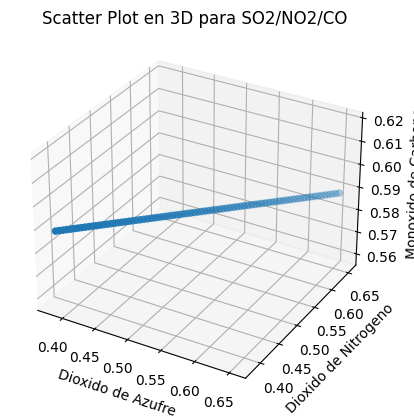

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate some example data (replace this with your actual data)
x = SO2
y = NO2
z = CO


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)

ax.set_xlabel('Dioxido de Azufre')
ax.set_ylabel('Dioxido de Nitrogeno')
ax.set_zlabel('Monoxido de Carbono')
plt.title('Scatter Plot en 3D para SO2/NO2/CO')
plt.show()


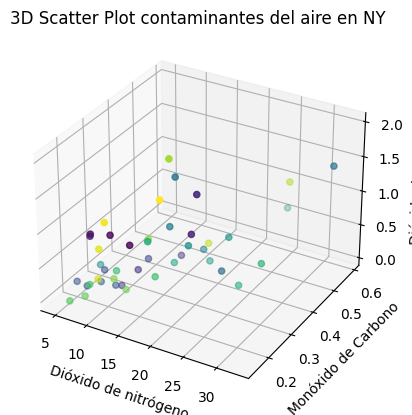

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(promediosAire['Nitrogen dioxide'], promediosAire["Carbon Monoxide"], promediosAire["Sulfur dioxide"], c=promediosAire.index)
ax.set_xlabel('Dióxido de nitrógeno')
ax.set_ylabel('Monóxido de Carbono')
ax.set_zlabel('Dióxido de Azufre')
ax.set_title('3D Scatter Plot contaminantes del aire en NY')

plt.show()